<a href="https://colab.research.google.com/github/anyaconda/my-fastai-2020/blob/master/my01_intro_clean_snippetPets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.7MB/s 
     |████████████████████████████████| 358kB 9.7MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 1.0MB 16.5MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 40kB 6.0MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 2.6MB 21.3MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *

# Your Deep Learning Journey

## The Software: PyTorch, fastai, and Jupyter

## Your First Model

### Getting a GPU Deep Learning Server

### Running Your First Notebook

In [ ]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

#myExplore
path.ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_167.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_110.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_107.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_27.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_19.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_76.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_67.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_46.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_109.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_18.jpg')...]

myExplore

In [ ]:
files = get_image_files(path)
print("Number of files: ", len(files))
files[0],files[6]

Number of files:  7390


(Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_167.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_67.jpg'))

In [ ]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [ ]:
#define a function 'is_cat' - labels cats based on a filename rule provided by the dataset creators:
# There is an easy way to distinguish: the name of the file begins with a capital for cats, and a lowercased letter for dogs
def is_cat(x): return x[0].isupper()

#To get our data ready for a model, we need to put it in a DataLoaders object.
#passed to this function 
#  -the directory we're working in,
#  -the files we grabbed, 
#  -our label_func 
#  -item_tfms: this is a Transform applied on all items of our dataset that will resize each image to 224 by 224
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))


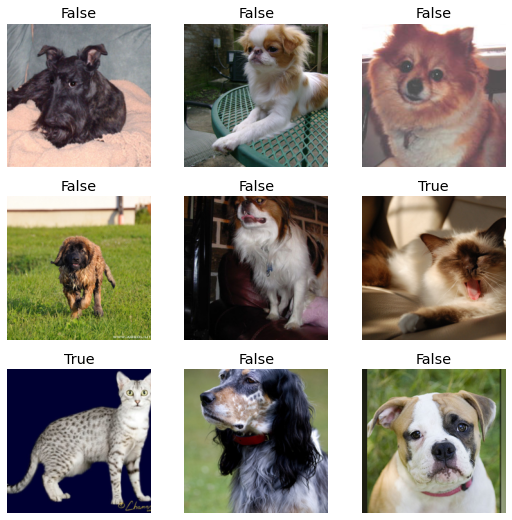

In [ ]:
dls.show_batch()

In [ ]:
#create a convolutional neural network (CNN) and specifies 
#  -what architecture to use (i.e. what kind of model to create), 
#  -what data we want to train it on, and 
#  -what metric to use:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.148860,0.018406,0.005413,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.065643,0.027334,0.006089,00:49


The first line downloaded a model called ResNet34, pretrained on ImageNet, and adapted it to our specific problem. It then fine tuned that model and in a relatively short time, we get a model with an error rate of 0.3%... amazing!

### Sidebar: This Book Was Written in Jupyter Notebooks

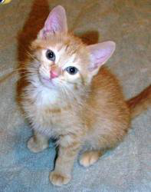

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(192)

### End sidebar

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
# uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [ ]:
#predict
print(files[0])
learn.predict(files[0])

/root/.fastai/data/oxford-iiit-pet/images/samoyed_167.jpg


('False', tensor(0), tensor([1.0000e+00, 8.1281e-07]))

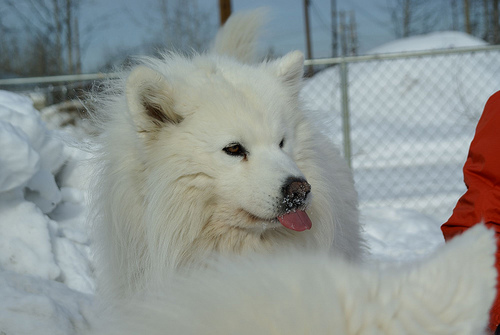

In [ ]:
Image.open('/root/.fastai/data/oxford-iiit-pet/images/samoyed_167.jpg')

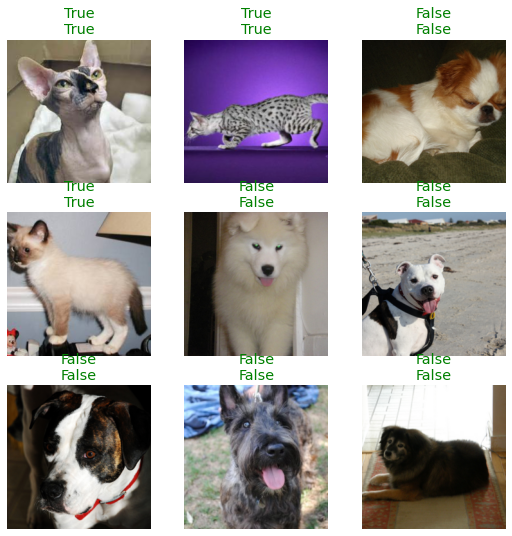

In [ ]:
learn.show_results()

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000039
